# A Sentiment Analysis on Brands and Product Emotions

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> **Introduction:** Company Goku is going to launch a new mobile phone soon. They are worried about how people will react to it, and they want to keep an eye on its popularity. 


> **Problem Statement:** The problem at hand is to build an NLP model that can analyze Twitter sentiment about Apple and Google products, which have the largest market dominance in the industry. The dataset comprises over 9,000 Tweets that have been rated by human raters as positive, negative, or neutral. This project aims to address the challenge faced by tech companies in understanding customer sentiment towards their products and gain valuable insights from customer feedback. This will improve customer satisfaction and enable Company Goku to stay ahead of the competition in the highly competitive tech industry.


> **Main Objective:** Create a Sentiment Analysis model that can accurately predict whether tweets about the phone are positive, negative, or neutral.

### b) Defining the Metric for Success 

The model will be considered a success if the model has an accuracy of 75%, a recall of 70% and macro-average recall 75%.

### c) Recording the Experimental Design 

1.Data Collection

2.Reading the Data 

3.Checking the Data 

4.External Data Source Validation

5.Data Cleaning

6.Exploratory Data Analysis

7.Data Modeling

8.Observations from the model

9.Conclusion

10.Recommendations

11.Future Improvement Ideas

### d) Data Understanding 

| Feature | Contents|
|:--- |:--- |
|Text_data|This column contains tweets in terms of text data about the different brands and products.|
|Emotion_in_tweet_is directed_at|This column contains data on the different services and products of different brands that the text is associated with. It contains a meaningful relationship between the brand and potential customers which describes basic emotions.|
|Is_therea_an_emotion directed at the brand|Contains the classification based on the *Emotion_in_tweet_is directed_at* column, for example positive, negative, and neutral.|

## 2. Reading the Data

In [319]:
# Loading the required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
from wordcloud import WordCloud
from textblob import TextBlob

import nltk
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import string

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mitchellchege/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [274]:
# Loading the data 

tweet_df = pd.read_csv("judge-1377884607_tweet_product_company.csv",encoding='ISO-8859-1')
tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [275]:
# Checking the shape of tweet_df

print(tweet_df.shape)

(9093, 3)




## 3. Checking the Data

In [276]:
# Previewing the top of our dataset
tweet_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [277]:
# Previewing the bottom of our dataset

tweet_df.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [278]:
# Checking whether each column has an appropriate datatype

tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


It can be noted that some columns in tweet_df contain null values. This will be tidied under data cleaning before any analysis is done. 

In [279]:
# Check for the percentage of missing data

tweet_df.isna().sum()*100/len(tweet_df)

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

The column *product* has 5802 missing values which is **63.8%** of the data. This is a significant amount of the data and even though the column may be usefull, the objective is to  predict the sentiment (positive, negative, or neutral) expressed in the tweets related to a particular topic or brand and so the column should may be dropped later.

In [280]:
# Checking for emotion_in_tweet_is_directed_at value counts

value_counts1 = tweet_df['emotion_in_tweet_is_directed_at'].value_counts()
value_counts1

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [281]:
# Checking for is_there_an_emotion_directed_at_a_brand_or_prouct value counts

value_counts2 = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
value_counts2

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## 4. External Data Source Validation

## 5. Cleaning the Dataset

### 5.1 Renaming columns 

In [282]:
# Renaming the columns 

tweet_df.rename(columns = {'tweet_text': 'Tweet','emotion_in_tweet_is_directed_at':'Product',
                           'is_there_an_emotion_directed_at_a_brand_or_product':'Emotion'},
                inplace = True)
tweet_df.tail()

,Tweet,Product,Emotion
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


Due to the extremely long column names, these were renamed to simplify the data cleaning process.

### 5.2 Deleting rows with no tweet data

In [283]:
# Deleting rows with no tweet data

df_clean = tweet_df.dropna(subset=['Tweet'])

In [284]:
#Confirming that the row was deleted

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    9092 non-null   object
 1   Product  3291 non-null   object
 2   Emotion  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


It was noted that the column Tweet had missing information. Seeing as this was only one row in a dataset containing 9000+ rows and there is no way to find out the contents of the tweet, it was dropped.

### 5.3 Deleting rows with "I can't tell"

In [285]:
# Deleting rows with "I can't tell"
df_clean = df_clean[df_clean.Emotion != "I can't tell"]
df_clean['Emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product'], dtype=object)

Since no information can be gained from the narration **"I can't tell"** ,the 156 rows were dropped.

### 5.4 Filling missing values

In [286]:
# Checking for unique itemns under product

df_clean['Product'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [287]:
# Creating a function for filling nan values in product

def categorize_devices(df, col_name, keywords=['iphone', 'apple', 'ipad', 'android', 'google']):
    # Convert column to lowercase string
    df[col_name] = df[col_name].astype(str).str.lower()
    
    # Initialize category column with 'Unknown'
    df['category'] = 'Unknown'
    
    # Categorize each row based on keywords
    for i, row in df.iterrows():
        text = row[col_name]
        if any(keyword in text for keyword in ['iphone', 'apple', 'ipad']):
            df.loc[i, 'category'] = 'Apple'
        elif 'android' in text:
            df.loc[i, 'category'] = 'Android'
        elif 'google' in text:
            df.loc[i, 'category'] = 'Google'
    
    return df


In [288]:
# Creating a subset of df_clean where product is nan

df_missing = df_clean[df_clean['Product'].isna() == True]
categorize_devices(df_missing,"Tweet").head()

,Tweet,Product,Emotion,category
5,@teachntech00 new ipad apps for #speechtherapy...,NaN,No emotion toward brand or product,Apple
16,holler gram for ipad on the itunes app store -...,NaN,No emotion toward brand or product,Apple
32,"attn: all #sxsw frineds, @mention register fo...",NaN,No emotion toward brand or product,Android
33,anyone at #sxsw want to sell their old ipad?,NaN,No emotion toward brand or product,Apple
34,anyone at #sxsw who bought the new ipad want ...,NaN,No emotion toward brand or product,Apple


In [289]:
# Updating df_clean product with values extrapolated from df_missing

df_clean['Product_updated'] = df_clean['Product'].fillna(df_missing['category'])
df_clean['Product_updated'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Apple',
       'Android', 'Android App', 'Other Google product or service',
       'Unknown', 'Other Apple product or service'], dtype=object)

In [290]:
# Dropping df_clean Product

df_clean = df_clean.drop(columns = ['Product'], axis = 1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8936 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8936 non-null   object
 1   Emotion          8936 non-null   object
 2   Product_updated  8936 non-null   object
dtypes: object(3)
memory usage: 279.2+ KB


There were about 5,802 missing values for the column Product, the Tweet column was analysed and any mention of words like "Google", "ipad","Apple" etc. were then used to replace the missing values. While dropping the missing values was an option the missing data was too large to take this approach. 

### 5.5 Data anonymization of handles

In [291]:
# Data anonymization of handles

df_clean.Tweet = df_clean.Tweet.apply(lambda x: re.sub("@[A-Za-z0-9]+", "", x))
df_clean.Tweet

0       . I have a 3G iPhone. After 3 hrs tweeting at ...
1        Know about  ? Awesome iPad/iPhone app that yo...
2        Can not wait for #iPad 2 also. They should sa...
3        I hope this year's festival isn't as crashy a...
4        great stuff on Fri #SXSW: Marissa Mayer (Goog...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT  We interrupt your regularly ...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT  ...
Name: Tweet, Length: 8936, dtype: object

The handles of the specific users were dropped to protect their identities and maintain data privacy.

### 5.6 Checking for duplicates

In [292]:
# Checking for duplicates

df_clean.duplicated().any()

True

In [293]:
# Identifying duplicates in df_clean

duplicated_values = df_clean[df_clean.duplicated(keep = False)]
duplicated_values.shape

(55, 3)

In [294]:
# Drop duplicated rows 

df_clean.drop_duplicates(inplace = True)
df_clean.shape

(8906, 3)

All duplicates were dropped to enhance accuracy when building the model. 

## 6. Exploratory Data Analysis

### 6.1 Identifying the most common words

In [295]:
df_clean['Emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product'], dtype=object)

In [296]:
# Specifying the emotion to be plotted
condition = df_clean['Emotion'] == 'Negative emotion'
neg_result = df_clean.loc[condition]

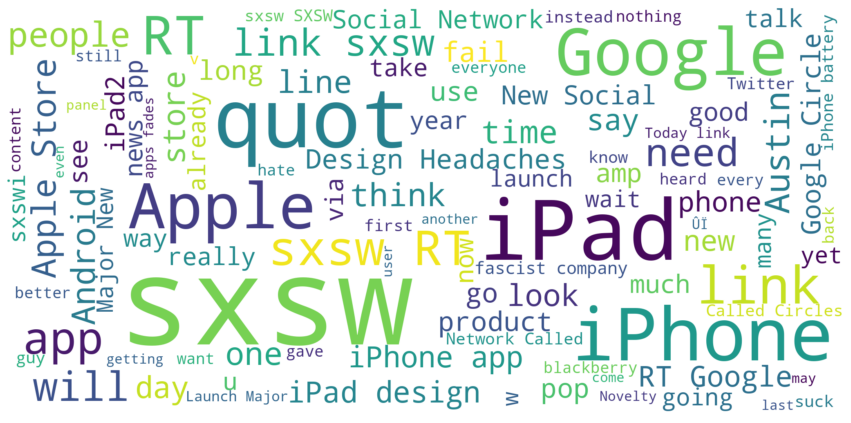

In [297]:
# Generate a string of all the tweet texts

all_text = ' '.join(neg_result['Tweet'])

# Create the word cloud
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=2048, 
                      height=1000).generate(all_text)

# Display the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [298]:
# Specifying the emotion to be plotted
condition = df_clean['Emotion'] == 'Positive emotion'
pos_result = df_clean.loc[condition]

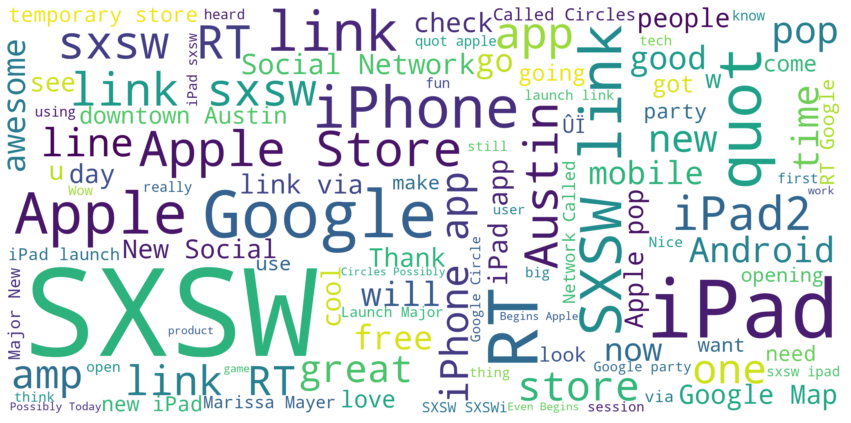

In [299]:
# Generate a string of all the tweet texts

all_text = ' '.join(pos_result['Tweet'])

# Create the word cloud
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=2048, 
                      height=1000).generate(all_text)

# Display the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [300]:
# Specifying the emotion to be plotted
condition = df_clean['Emotion'] == 'No emotion toward brand or product'
neutral_result = df_clean.loc[condition]

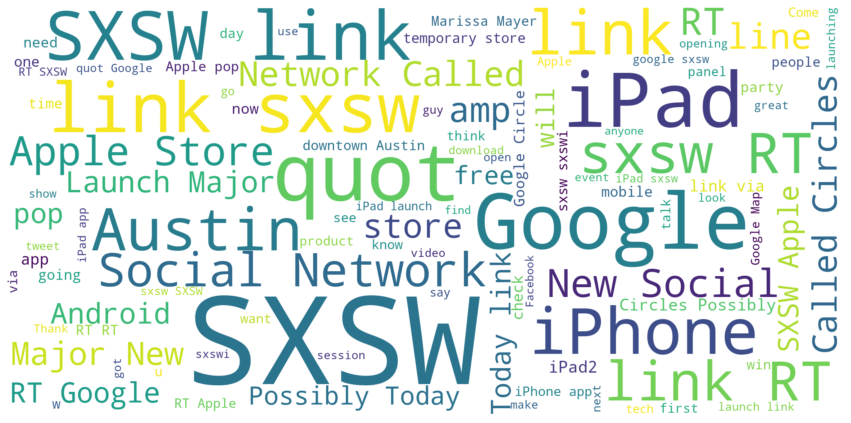

In [301]:
# Generate a string of all the tweet texts

all_text = ' '.join(neutral_result['Tweet'])

# Create the word cloud
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=2048, 
                      height=1000).generate(all_text)

# Display the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

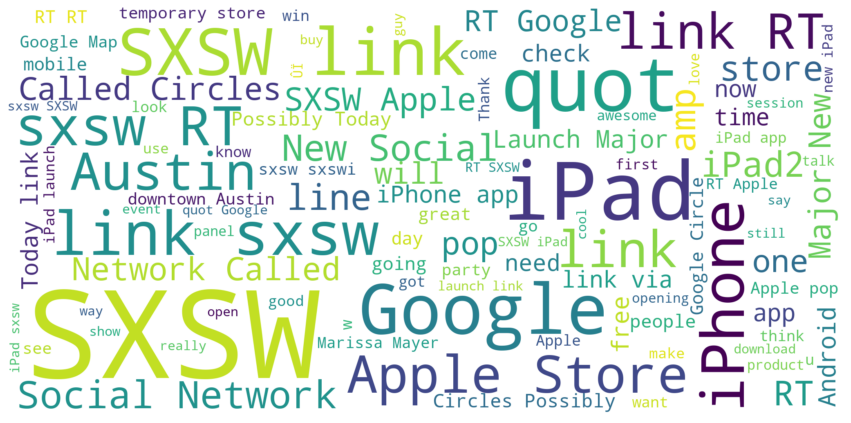

In [302]:
# Generate a string of all the tweet texts

all_text = ' '.join(df_clean['Tweet'])

# Create the word cloud
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      max_font_size=300,
                      width=2048, 
                      height=1000).generate(all_text)

# Display the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

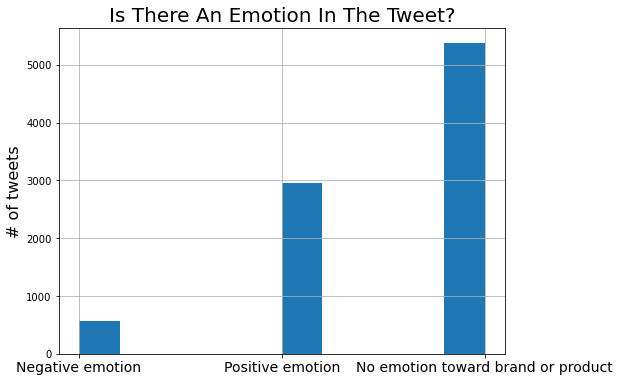

In [303]:
plt.figure(figsize=(8,6))
df_clean.Emotion.hist(xlabelsize=14)
plt.title('Is There An Emotion In The Tweet?', fontsize=20)
plt.ylabel('# of tweets', fontsize=16)
plt.show()


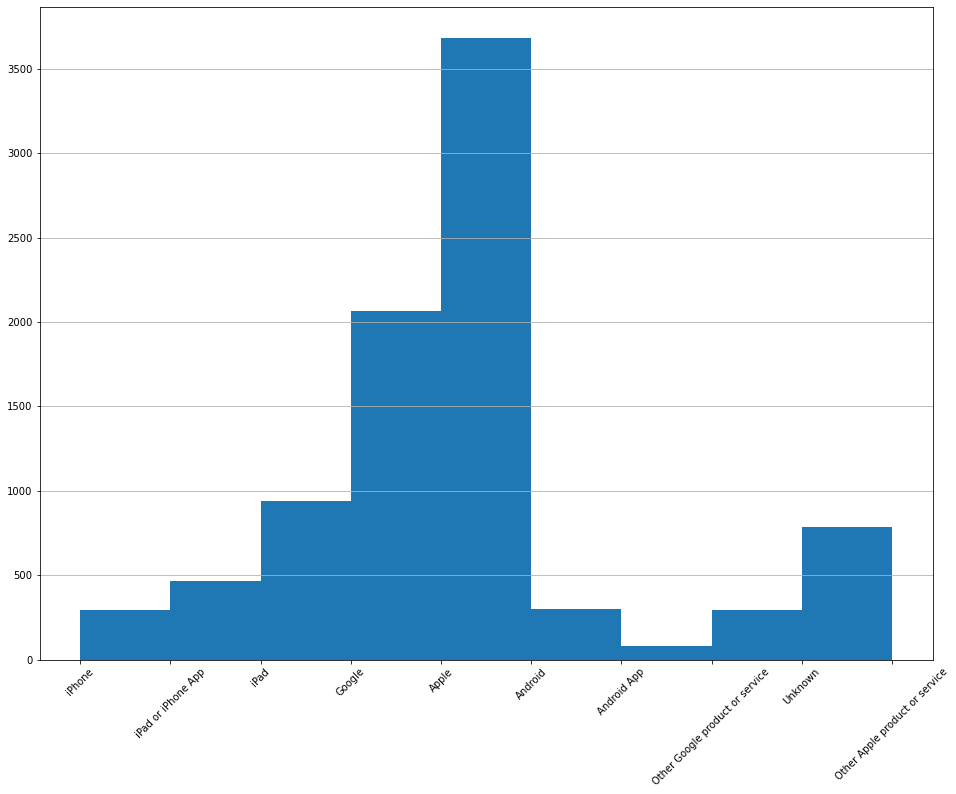

In [304]:
plt.figure(figsize=(16,12))
df_clean.Product_updated.hist(bins=9)
plt.xticks(rotation=45)
plt.grid(b=False, axis='x')
plt.show()


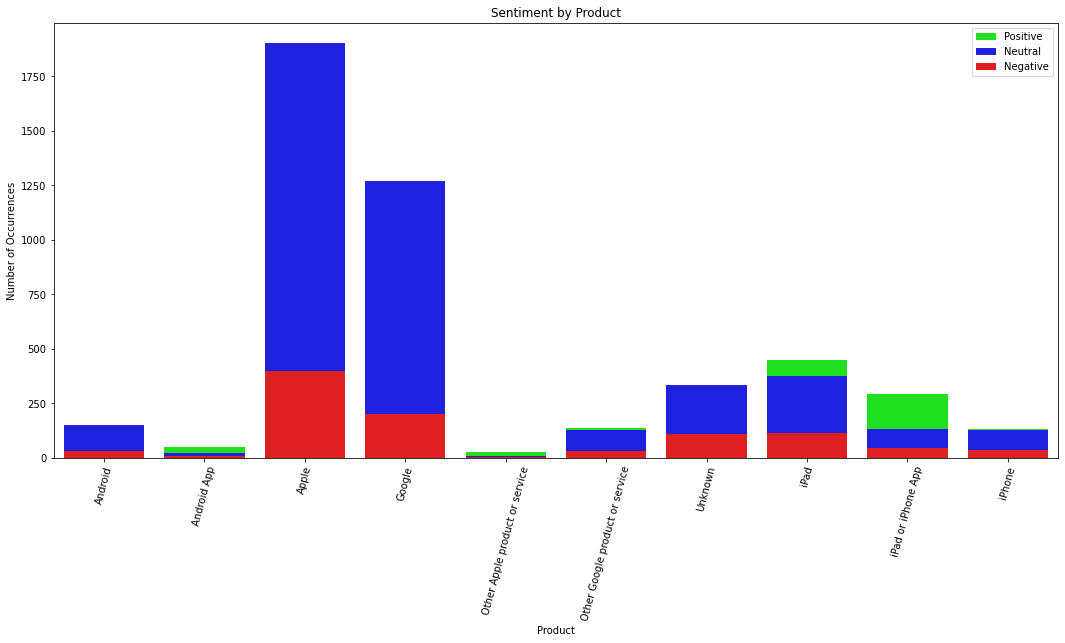

In [305]:
# Remove rows with missing sentiment values
df_clean.dropna(subset=["Tweet"], inplace=True)
# Compute the sentiment polarity of each tweet
df_clean["Polarity"] = df_clean["Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
# Assign each tweet to a sentiment category
df_clean["Sentiment"] = pd.cut(df_clean["Polarity"], bins=[-1, -0.1, 0.1, 1], labels=["Negative", "Neutral", "Positive"])
# Count the number of occurrences of each sentiment by product
sentiment_counts = pd.crosstab(df_clean["Product_updated"], df_clean["Sentiment"])
# Plot the result
plt.figure(figsize=(18,8))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts["Positive"], color="lime", label="Positive")
sns.barplot(x=sentiment_counts.index, y=sentiment_counts["Neutral"], color="blue", label="Neutral")
sns.barplot(x=sentiment_counts.index, y=sentiment_counts["Negative"], color="red", label="Negative")
plt.title("Sentiment by Product")
plt.xlabel("Product")
plt.xticks(rotation=75)
plt.ylabel("Number of Occurrences")
plt.legend()
plt.show()

## 7. Data Modeling

### 7.1 Pre Processing

#### a. Dropping unecessary columns for modelling

In [306]:
#  Dropping unecessary columns for modelling

df_clean.drop(columns = ['Product_updated','Polarity',
                         'Sentiment'],inplace = True)
df_clean.head()

,Tweet,Emotion
0,. I have a 3G iPhone. After 3 hrs tweeting at ...,Negative emotion
1,Know about ? Awesome iPad/iPhone app that yo...,Positive emotion
2,Can not wait for #iPad 2 also. They should sa...,Positive emotion
3,I hope this year's festival isn't as crashy a...,Negative emotion
4,great stuff on Fri #SXSW: Marissa Mayer (Goog...,Positive emotion


#### b. Tokenizing the feature (X)

In [325]:
# # Defining X and Y
# X = df_clean['Tweet']
# y = df_clean['Emotion']

In [308]:
# Changing to lower case
df_clean.Tweet = df_clean.Tweet.str.lower()

In [309]:
# remove url links
df_clean.Tweet = df_clean.Tweet.apply(lambda x: re.sub(r'https?:\/\/\S+', '', str(x)))


In [310]:
# remove {link}
df_clean.Tweet = df_clean.Tweet.apply(lambda x: re.sub(r'{link}', '', x))



In [311]:
# remove &text; html chars
df_clean.Tweet = df_clean.Tweet.apply(lambda x: re.sub(r'&[a-z]+;', '', x))



In [312]:
# [video]
df_clean.Tweet = df_clean.Tweet.apply(lambda x: re.sub(r"\[video\]", '', x))



In [313]:
# remove all remaining characters that aren't letters, white space, or 
# the following #:)(/\='] that are used in emojis or hashtags
df_clean.Tweet = df_clean.Tweet.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x,))

In [314]:
df_clean.iloc[90:100]

,Tweet,Emotion
92,what #sxsw does not provide iphone chargers...,Negative emotion
93,wonder if will be in the apple flashmob: tc...,No emotion toward brand or product
94,wonder if is putting tips from the api #sxsw...,No emotion toward brand or product
95,xmas rt shiny new apps a new book pop-up ...,Positive emotion
96,yai rt new #ubersocial for #iphone now in the...,Positive emotion
97,yes rt hey i've got another gem for you -- ...,No emotion toward brand or product
98,fast fun future: of google presenting at #sx...,Positive emotion
99,gsdm google's industry party tonight - see u...,No emotion toward brand or product
100,new buzz google to launch major new social ne...,No emotion toward brand or product
101,headline: #ipad is the must-have gadget at #s...,Positive emotion


In [324]:
# Create a list of stopwords in English
# sample text
# text = "This is an example sentence that contains stop words."

# tokenize the text into words
words = nltk.word_tokenize(str(df_clean['Tweet']))

# remove stop words from the list of words
stop_words = set(stopwords.words('english')) # set of English stop words
words_filtered = [word for word in words if word.casefold() not in stop_words]

# join the filtered words back into a string
text_filtered = ' '.join(words_filtered)
text_filtered 

"0 g iphone hrs tweeting # ris ... 1 know awesome ipad/iphone app ... 2 wait # ipad also sale ... 3 hope year 's festival n't crashy ... 4 great stuff fri # sxsw : marissa mayer ( goog ... ... 9088 ipad everywhere # sxsw 9089 wave buzz rt interrupt regularly sche ... 9090 google 's zeiger physician never reported pot ... 9091 verizon iphone customers complained ... 9092 rt google tests check-in offers # sxsw Name : Tweet , Length : 8906 , dtype : object"

### 7.2 Model 1

### 7.3 Model 2

## 8. Observations on the trained models

## 9. Conclusions

## 10. Recommendations

## 11. Future improvement Ideas